# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('ggplot')
import pandas as pd
import seaborn as sns

# Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [9]:
data = pd.read_csv('weight-height.csv')
male_df = data[data['Gender'] == 'Male']
female_df =  data[data['Gender'] == 'Female']
#male_df.head(3)
#female_df.head(3)
male_height_mean = male_df['Height'].mean()
male_height_sd = male_df['Height'].std()
male_weight_mean = male_df['Weight'].mean()
male_weight_sd = male_df['Weight'].std()
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
female_height_mean = female_df['Height'].mean()
female_height_sd = female_df['Height'].std()
female_weight_mean = female_df['Weight'].mean()
female_weight_sd = female_df['Weight'].std()
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

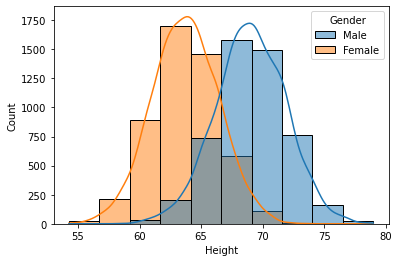

In [13]:
# Your code here
sns.histplot(data=data, x='Height', hue='Gender', kde=True, bins=10, alpha=0.5)
plt.show()

In [ ]:
# Record your observations - are these inline with your personal observations?
# This seems to be accurate. On average Males are taller than Females.

In [ ]:
# Record your observations - are these inline with your personal observations?

# Men tend to have higher values of heights in general than female
# The most common region for male and female heights is between 65 - 67 inches (about 5 and a half feet)
# Male heights have a slightly higher spread than female heights, hence the male height peak is slightly smaller than female height
# Both heights are normally distributed

## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

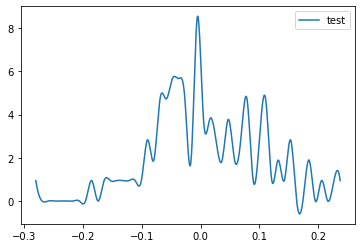

In [17]:
from scipy.interpolate import interp1d

def density(x):
    hist, edges = np.histogram(x, bins=50, density=True)
    x = (edges[:-1] + edges[1:]) / 2
    y = hist
    f = interp1d(x, y, kind='cubic')
    x_new = np.linspace(x.min(), x.max(), num=1000)
    y_new = f(x_new)
    return x_new, y_new


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

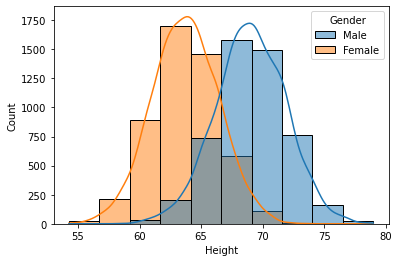

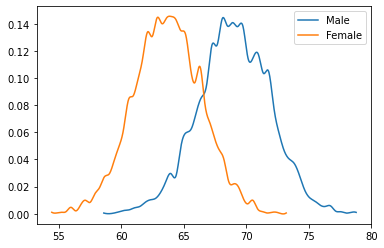

In [26]:
# Your code here
sns.histplot(data=data, x='Height', hue='Gender', kde=True, bins=10, alpha=0.5)
plt.show()

male_heights = data[data['Gender'] == 'Male']['Height']
female_heights = data[data['Gender'] == 'Female']['Height']

x_male, y_male = density(male_heights)
x_female, y_female = density(female_heights)

plt.plot(x_male, y_male, label='Male')
plt.plot(x_female, y_female, label='Female')
plt.legend()
plt.show()

## Repeat the above exercise for male and female weights

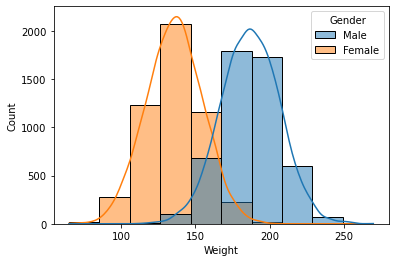

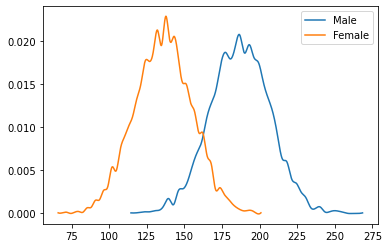

In [25]:
# Your code here
sns.histplot(data=data, x='Weight', hue='Gender', kde=True, bins=10, alpha=0.5)
plt.show()

male_weights = data[data['Gender'] == 'Male']['Weight']
female_weights = data[data['Gender'] == 'Female']['Weight']

x_male, y_male = density(male_weights)
x_female, y_female = density(female_weights)

plt.plot(x_male, y_male, label='Male')
plt.plot(x_female, y_female, label='Female')
plt.legend()
plt.show()

## Write your observations in the cell below

In [ ]:
# Record your observations - are these inline with your personal observations?

# The patterns and overlap are highly similar to what we see with height distributions
# Men generally are heavier than women
# The common region for common weights is around 160 lbs. 
# Male weight has slightly higher spread than female weight (i.e. more variation)
# Most females are around 130-140 lbs whereas most men are around 180 pounds.

#Takeaway

# Weight is more suitable to distinguish between males and females than height

## Repeat the above experiments in seaborn and compare with your results

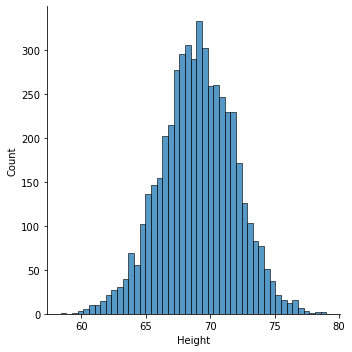

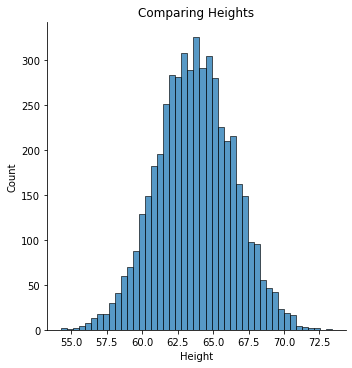

In [27]:
# Code for heights here
sns.displot(male_df.Height)
sns.displot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

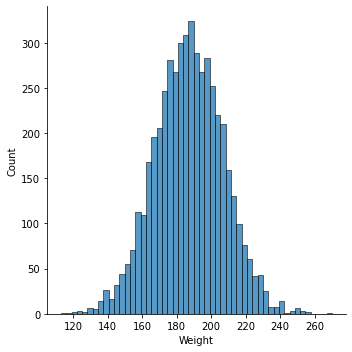

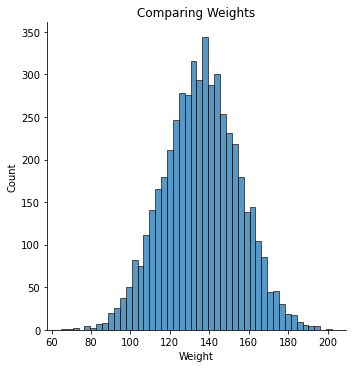

In [28]:
# Code for weights here
sns.displot(male_df.Weight)
sns.displot(female_df.Weight)
plt.title('Comparing Weights')
plt.show()

In [ ]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# While they still show the same density, sns breaks down the gender in a way that is easier to see

In [ ]:
# Well, what do you think? Overlapping or side to side (or rather top/bottom)
# I think it depends but for the majority of the time I would prefer the side to side

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.